In [1]:
import sys
import os
import itertools
import numpy as np
import torch as tr
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_context('talk')

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

datadir = '../data/pwm-data/'

In [2]:
df = pd.read_csv(datadir+'rat_behavior.csv')
nsubs = len(df.subject_id.unique())

In [3]:
def ma(X,w=10):
  # moving average
  R = np.zeros(len(X)-w)
  for i in range(len(R)):
    R[i] = X[i:i+w].mean()
  return R

# hitrate

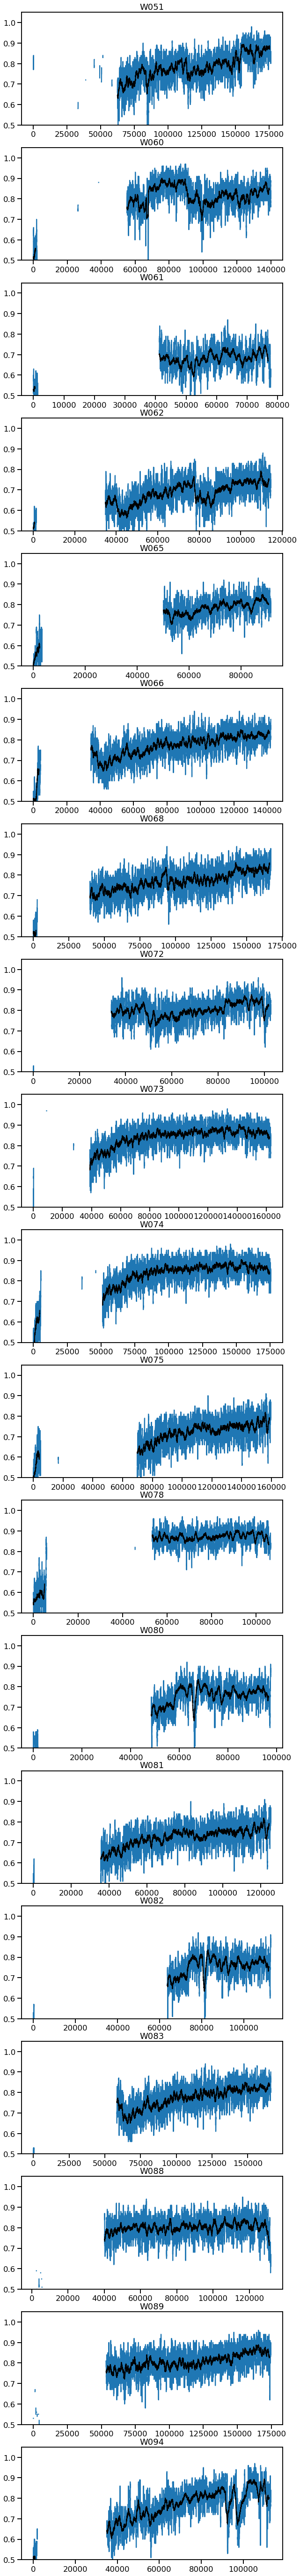

In [4]:
f,axa = plt.subplots(nsubs,figsize=(10,100),sharey=True)
for sidx,(sid,sdf) in enumerate(df.groupby('subject_id')):
  ax = axa[sidx]
  ax.plot(ma(sdf.hit.values,w=100))
  ax.plot(ma(sdf.hit.values,w=1000),c='k',lw=2)
  ax.set_ylim(0.5,1.05)
  ax.set_title(sid)

# from readme_ratdata
Data description, by column:
1) subject_id: The name of the rat (19 total subjects)
2) session: The session number, where 1 is the first session of training
3) trial: The trial number within a session, where 1 is the first trial 
4) s_a: The loudness of stimulus A (pink noise) in decibels (dB) (NaN during training_stage 1)
5) s_b: The loudness of stimulus B (pink noise) in decibels (dB) (NaN during training_stage 1)
6) choice: The choice made by the rat, where Left=0 and Right=1 (and Mistrial=NaN)
7) correct_side: The correct side, where Left=0 and Right=1
8) hit: If the rat made the correct choice, where Incorrect=0 and Correct=1 (and Mistrial=NaN)
9) delay: The duration of the delay between the end of Tone A and the start of Tone B, in seconds. See the example trial timeline below for more information.
10) training_stage: Index indicating the stage of training (1-4, see below)

Timeline of an example trial during the final stage (4) of training:
1) A light in the center port indicates that a new trial can be initiated, at which point the rat can nose-poke in the center port
2) After the start of the nose-poke, there is a 0.25 sec delay before the start of Tone A
3) Tone A plays for 0.4 sec
4) There is a variable delay (recorded in the "delay" column in the CSV file)
5) Tone B plays for 0.4 sec
6) After the end of Tone B, there is a 0.25 sec delay before the Go cue is played
7) A Go cue plays for 0.2 sec


The rat is free to withdraw from the center port and make a choice at the start of the Go cue.
The total duration of the center nose-poke on each trial is thus 0.25 + 0.4 + "delay" + 0.4 + 0.25, or 1.3 + "delay" seconds.
Any break of center nose-poke during this time (steps 2-6) results in a Mistrial.
During training_stage 1 (ShapingStage), there is no tone played.


training_stage descriptions:
1) ShapingStage: chasing lights, no tones, building center nose-poke, s_a and s_b are NaN
2) ImmediateReward: s_a and s_b are played, and independent of the animals's choice reward is delivered according to the rule (s_a > s_b -> Right, s_b > s_a -> Left), and animal can immediately collect the reward from the other side, after a wrong choice.
3) DelayedReward: the standard task, except the wrong side will still deliver a reward after a 1-5 sec delay
4) NoReward: the standard task


Notes:
- Two types of trials were omitted from the dataset due to anomalies: (1) 14 trials were omitted for having anomalous stimulus values, and (2) 26 trials were omitted for having inconsistent correct_side values. These omissions are reflected in the data set as gaps in the "trial" count.
- There are 256691 trials that are Mistrials, where both "choice" and "hit" are NaN. These are trials where the rat did not complete the trial for various reasons (e.g. it broke center fixation early). Also, at some point after session 100 (differs for each rat), mistrials are no longer included in the data.
- For some rats, there are a few sessions late in training where training_stage reverts back to 1. This is for rats that suddenly started to do poorly and had their training reverted back to initial shaping stages, temporarily.

